# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`This is how we write code`

## Let's make some data to work on

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


Text(0.5, 0, 'Y')

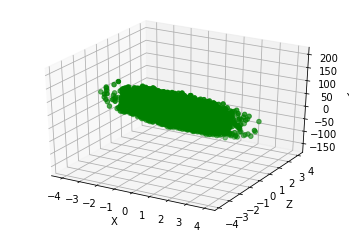

In [11]:
from sklearn.datasets import make_regression
#MULTIPLE LINEAR REGRESSION
n = 10000
X = np.random.randn(n)
Z = np.random.randn(n)
randomize = np.random.randint(-50,50, size = n)
y = []
for i in range(n):
    y.append((2*X[i])-(40*Z[i])+24)

for i in range(n):
    y[i] = y[i] + randomize[i]
    
datadict = {'X1': X, 'X2': Z, 'target': y}
data = pd.DataFrame(data=datadict)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Z, y, zdir='z', color="green", s=20, c=None, depthshade=True)
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y") 

In [12]:
X = data.iloc[:,[0, 1]].values
type(X)

numpy.ndarray

In [0]:
y = data.target.values

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler 
scaleObj = StandardScaler()
X_train = scaleObj.fit_transform(X_train)
X_test = scaleObj.transform(X_test)


In [19]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(D,))
dense_layer_1 = Dense(20, activation='relu')(input_layer)
dense_layer_2 = Dense(20, activation='relu')(input_layer)
output = Dense(1)(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse']
)

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
250/250 [==============================] - 0s 2ms/step - loss: 2903.8306 - mse: 2903.8306 - val_loss: 2858.2610 - val_mse: 2858.2610
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 2550.4934 - mse: 2550.4934 - val_loss: 2346.6489 - val_mse: 2346.6489
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 1979.5082 - mse: 1979.5082 - val_loss: 1725.2460 - val_mse: 1725.2460
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 1436.0159 - mse: 1436.0159 - val_loss: 1251.1064 - val_mse: 1251.1064
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 1094.6106 - mse: 1094.6106 - val_loss: 1009.4434 - val_mse: 1009.4434
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 945.8003 - mse: 945.8003 - val_loss: 917.2850 - val_mse: 917.2850
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 895.6177 - mse: 895.6177 - val_loss: 886.6312 - val_mse: 886.6312


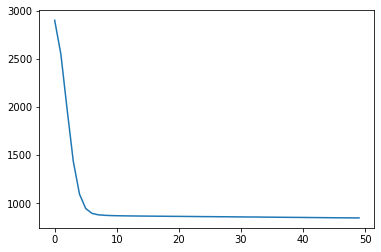

In [20]:
plt.plot(report.history['loss'], label="loss = SGD")

In [21]:
print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


Text(0.5, 0, 'Y')

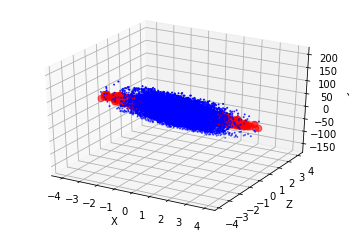

In [32]:
y_predicted = model.predict(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, zdir='z', color="blue", s=1, c=None, depthshade=True)
ax.scatter(X[:,0], X[:,1], y_predicted, zdir='z', color="red", s=40, c=None, depthshade=True)

ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y") 

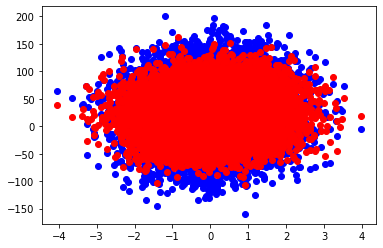

In [33]:
y_predicted = model.predict(X)
plt.scatter(X[:,0],y, color='b')
plt.scatter(X[:,0],y_predicted, color='r')
plt.show()

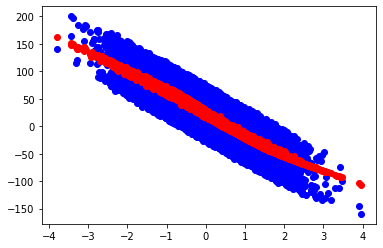

In [34]:
plt.scatter(X[:,1],y, color='b')
plt.scatter(X[:,1],y_predicted, color='r')
plt.show()

In [35]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))

250/250 [==============================] - 0s 1ms/step - loss: 847.2966 - mse: 847.2966
Train eval:  [847.296630859375, 847.296630859375]
63/63 [==============================] - 0s 1ms/step - loss: 848.7139 - mse: 848.7139
Test eval:  [848.7139282226562, 848.7139282226562]
